In [1]:
# %%
%matplotlib inline
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# %%
# get the classic mnist dataset
# one-hot means a sparse vector for every observation where only
# the class label is 1, and every other class is 0.
# more info here:
# https://www.tensorflow.org/versions/0.6.0/tutorials/mnist/download/index.html#dataset-object
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# %%
# mnist is now a DataSet with accessors for:
# 'train', 'test', and 'validation'.
# within each, we can access:
# images, labels, and num_examples
print(mnist.train.num_examples,
      mnist.test.num_examples,
      mnist.validation.num_examples)

55000 10000 5000


In [4]:
# %% the images are stored as:
# n_observations x n_features tensor (n-dim array)
# the labels are stored as n_observations x n_labels,
# where each observation is a one-hot vector.
print(mnist.train.images.shape, mnist.train.labels.shape,mnist.test.images.shape)

(55000, 784) (55000, 10) (10000, 784)


In [5]:
# %% the range of the values of the images is from 0-1
print(np.min(mnist.train.images), np.max(mnist.train.images))

0.0 1.0


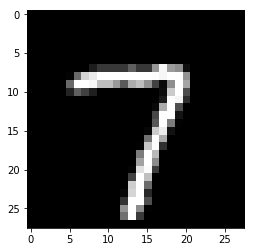

In [6]:
# %% we can visualize any one of the images by reshaping it to a 28x28 image
plt.imshow(np.reshape(mnist.train.images[100, :], (28, 28)), cmap='gray')

In [7]:
# %% We can create a container for an input image using tensorflow's graph:
# We allow the first dimension to be None, since this will eventually
# represent our mini-batches, or how many images we feed into a network
# at a time during training/validation/testing.
# The second dimension is the number of features that the image has.
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])

`tf.nn.softmax(logits, name=None)  `
For each batch i and class j we have: `softmax[i, j] = exp(logits[i, j]) / sum(exp(logits[i]))`  
$P( y^{(i)} = j|x^{(i)};\theta) = \frac{e^{\theta_j^T}x^{(j)}}{\sum_{i=1}^k e^{\theta_j^T}x^{(j)}} $


In [11]:
# %% We can write a simple regression (y = W*x + b) as:
W = tf.Variable(tf.zeros([n_input, n_output]))
b = tf.Variable(tf.zeros([n_output]))
net_output = tf.nn.softmax(tf.matmul(net_input, W) + b) #预测函数

In [12]:
# %% We'll create a placeholder for the true output of the network
y_true = tf.placeholder(tf.float32, [None, 10])

In [13]:
# %% And then write our loss function:
cross_entropy = -tf.reduce_sum(y_true * tf.log(net_output))

In [14]:
# %% This would equate each label in our one-hot vector between the
# prediction and actual using the argmax as the predicted label
correct_prediction = tf.equal(
    tf.argmax(net_output, 1), tf.argmax(y_true, 1))

In [15]:
# %% And now we can look at the mean of our network's correct guesses
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [16]:
# %% We can tell the tensorflow graph to train w/ gradient descent using
# our loss function and an input learning rate
optimizer = tf.train.GradientDescentOptimizer(
    0.01).minimize(cross_entropy)

In [18]:
# %% We now create a new session to actually perform the initialization the
# variables:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:
# %% Now actually do some training:
batch_size = 100
n_epochs = 10
for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
    print(sess.run(accuracy,
                   feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels
                   }))

0.9224
0.9076
0.9212
0.9228
0.9242
0.9258
0.9232
0.922
0.9254
0.9238


In [20]:
# %% Print final test accuracy:
print(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels
               }))

0.9185
